This tutorial is about
- Apply non-zero momentum in CNN
- Symmetry projection to excited state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import quantax as qtx

qtx.set_default_dtype(jnp.complex128)
lattice = qtx.sites.Square(4, Nparticle=(8, 8))
N = lattice.N

In [ ]:
from quantax.symmetry import SpinInverse, C4v, Trans2D

# J1=1, J2=0.5, with Marshall sign rule
H = qtx.operator.Heisenberg(J=[1, 0.5], n_neighbor=[1, 2], msr=True)

# translation symmetry with (pi, pi) momentum
trans_symm = Trans2D(sector=(2, 2))

# apply non-zero momentum by the summation in the last layer
# for details see https://journals.aps.org/prb/abstract/10.1103/PhysRevB.108.054410
net = qtx.model.ResSum(2, 8, 4, trans_symm=trans_symm)

state = qtx.state.Variational(
    net,
    max_parallel=32768,
)

# sampler contains spin exchanges between nearest and next nearest neighbors
sampler = qtx.sampler.SpinExchange(state, 1000, n_neighbor=[1, 2])
optimizer = qtx.optimizer.SR(state, H)

AttributeError: module 'quantax.sampler' has no attribute 'SpinExchange'

Could not load symbol cuFuncGetName. Error: /lib/x86_64-linux-gnu/libcuda.so.1: undefined symbol: cuFuncGetName
2025-08-07 16:43:08.845437: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:08.995834: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:09.179812: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:09.345724: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please inv

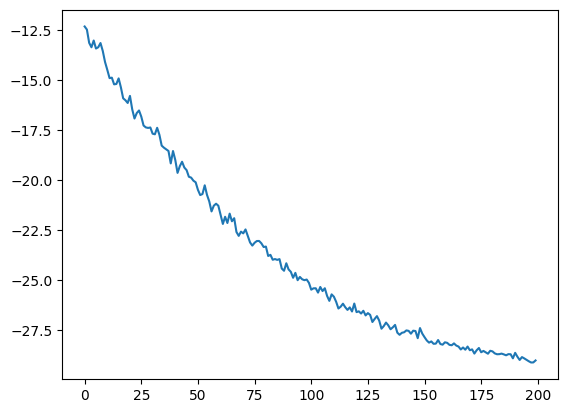

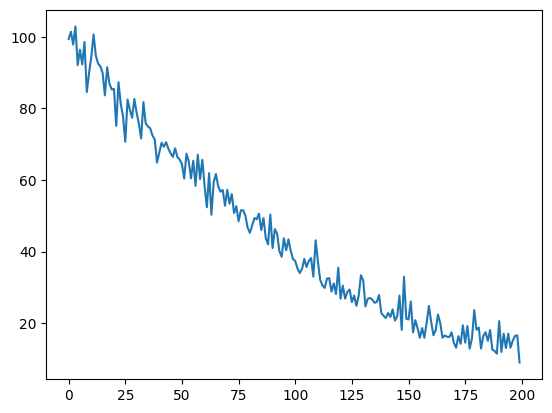

In [ ]:
energy_data = qtx.utils.DataTracer()
VarE_data = qtx.utils.DataTracer()

for i in range(200):
    samples = sampler.sweep()
    step = optimizer.get_step(samples)
    state.update(step * 1e-3)
    energy_data.append(optimizer.energy)
    VarE_data.append(optimizer.VarE)

energy_data.plot()
plt.show()
VarE_data.plot()
plt.show()

In [ ]:
# symmetrize the trained NQS

# SpinInverse(-1) projects to the sector psi(-s) = -psi(s)
symm = SpinInverse(-1) + C4v()

symm_state = qtx.state.Variational(
    state.model,
    symm=symm,
    max_parallel=32768,
)

sampler = qtx.sampler.SpinExchange(symm_state, 1000, n_neighbor=[1, 2])
optimizer = qtx.optimizer.SR(symm_state, H)

2025-08-07 16:43:35.328284: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:35.494931: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:35.802316: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:36.012580: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:43:36.333149: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86

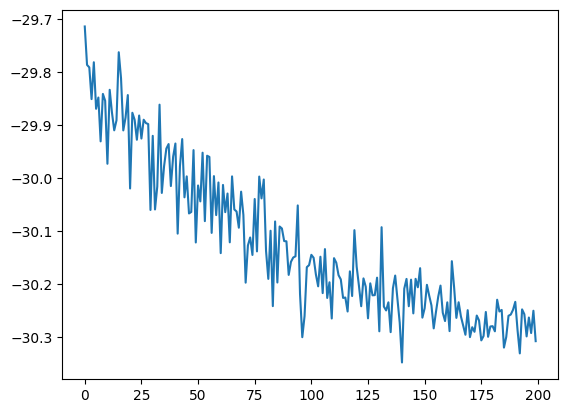

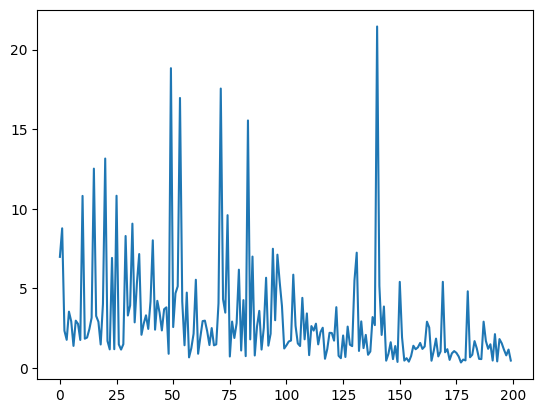

In [ ]:
energy_data = qtx.utils.DataTracer()
VarE_data = qtx.utils.DataTracer()

for i in range(200):
    samples = sampler.sweep()
    step = optimizer.get_step(samples)
    symm_state.update(step * 1e-3)
    energy_data.append(optimizer.energy)
    VarE_data.append(optimizer.VarE)

energy_data.plot()
plt.show()
VarE_data.plot()
plt.show()

In [6]:
# check result by ED, also projected to excited state sector
E, wf = H.diagonalize(symm)
print(E[0])

/home/aochen/quantax_env/lib/python3.12/site-packages/quantax/symmetry/symmetry.py:268: GeneralBasisWarning: using non-commuting symmetries can lead to unwanted behaviour of general basis, make sure that quantum numbers are invariant under non-commuting symmetries!
  basis = spin_basis_general(self.N, Nup, pauli=0, make_basis=False, **blocks)


-30.371072853485376
